In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [121]:
train_data = pd.read_csv("titanic_train.csv")

In [122]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Dictionary

In [123]:
data = {'Variable': ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       'Description': ['survival', 'ticket class', 'sex', 'age in years', '# of siblings/spouses aboard the titanic', 
                       '# of parents/children aboard the titanic', 'ticket number', 'passenger fare', 'cabin number', 
                       'port of embarkation']}

Data_dictionary = pd.DataFrame(data = data, columns = ['Variable', 'Description', 'Values'])
Data_dictionary.Values[0] = '0=No, 1=Yes'
Data_dictionary.Values[1] = '1=1st, 2=2nd, 3=3rd class'
Data_dictionary.Values[9] = 'C=Cherbourg, Q=Queenstown, S=Southampton'
Data_dictionary.fillna(' ', inplace=True)
Data_dictionary

,Variable,Description,Values
0,Survived,survival,"0=No, 1=Yes"
1,Pclass,ticket class,"1=1st, 2=2nd, 3=3rd class"
2,Sex,sex,
3,Age,age in years,
4,SibSp,# of siblings/spouses aboard the titanic,
5,Parch,# of parents/children aboard the titanic,
6,Ticket,ticket number,
7,Fare,passenger fare,
8,Cabin,cabin number,
9,Embarked,port of embarkation,"C=Cherbourg, Q=Queenstown, S=Southampton"


In [124]:
train_data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [125]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [128]:
train_data.Age = train_data.Age.fillna(train_data.Age.median())

# Data Visualization

# Survival 

In [129]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

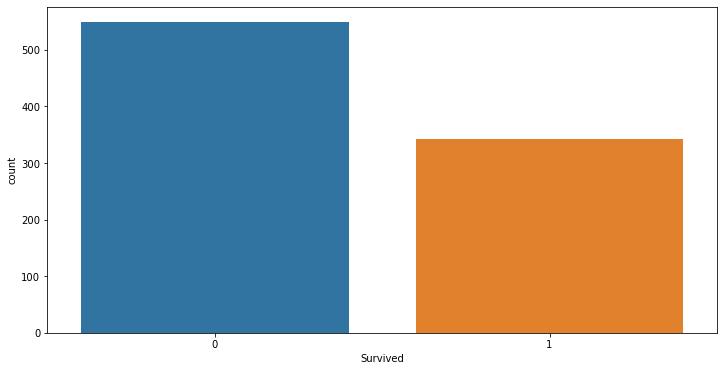

In [130]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_data.Survived)
plt.show()

# Age

In [131]:
minimum_age = min(train_data.Age)
if(minimum_age<1):
        print("Minimum age of person on board is {} month(s)".format(minimum_age*12))
else:
        print("Minimum age of person on board is {} year(s)".format(minimum_age))

print("Maximum age of person on board is {} year(s)".format(max(train_data.Age)))

Minimum age of person on board is 5.04 month(s)
Maximum age of person on board is 80.0 year(s)


In [132]:
print("Average age of people on board:", train_data.Age.median())

Average age of people on board: 28.0


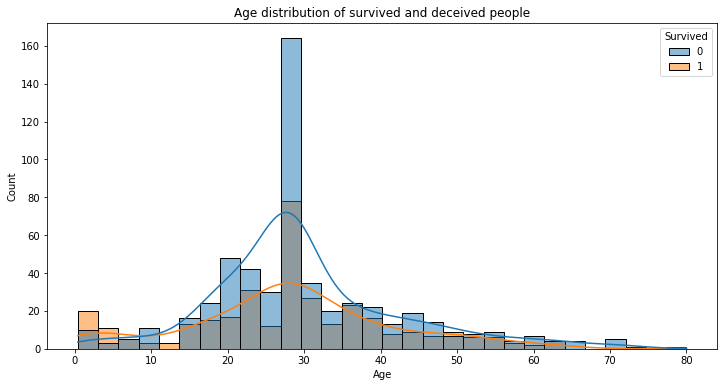

In [133]:
plt.figure(figsize=(12,6))
sns.histplot(x=train_data.Age, hue=train_data.Survived, kde=True)
plt.title("Age distribution of survived and deceived people")
plt.show()

<AxesSubplot:xlabel='PassengerId', ylabel='Age'>

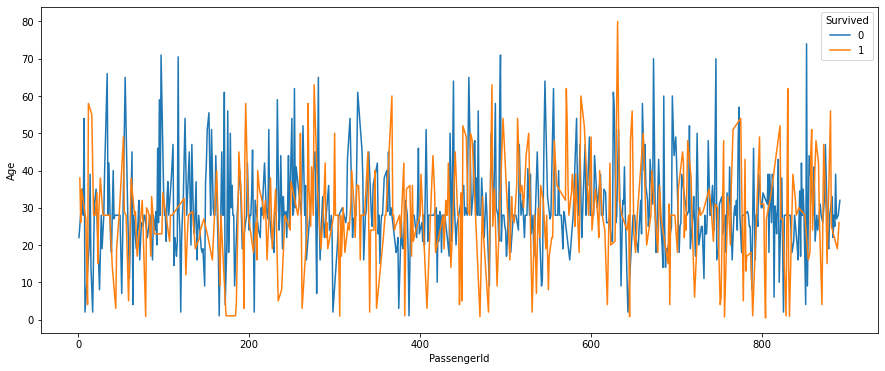

In [134]:
plt.figure(figsize=(15,6))
sns.lineplot(train_data.PassengerId, train_data.Age, hue=train_data.Survived)

In [135]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [136]:
print("Number of males and females survived:")
print(train_data[train_data.Survived==1].Sex.value_counts())

print("Number of males and females deceived:")
print(train_data[train_data.Survived==0].Sex.value_counts())

Number of males and females survived:
female    233
male      109
Name: Sex, dtype: int64
Number of males and females deceived:
male      468
female     81
Name: Sex, dtype: int64


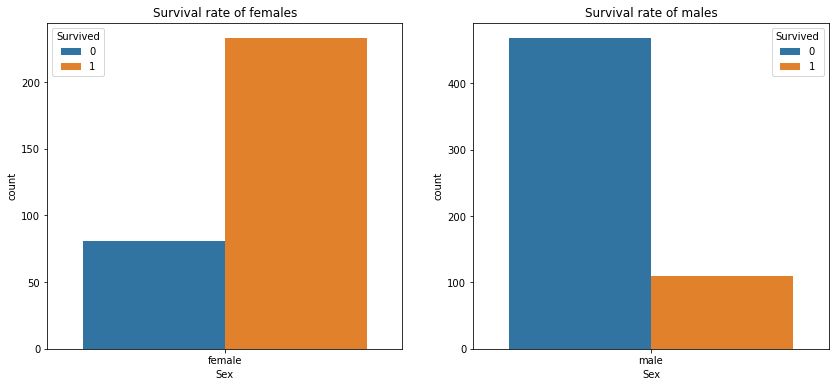

In [137]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(train_data[train_data.Sex=='female'].Sex, hue=train_data.Survived)
plt.title("Survival rate of females")
plt.subplot(1,2,2)
sns.countplot(train_data[train_data.Sex=='male'].Sex, hue=train_data.Survived)
plt.title("Survival rate of males")
plt.show()

# Pclass

In [138]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [139]:
print("Number of people survived according to class")
print(train_data[train_data.Survived==1].Pclass.value_counts())
print("Number of people deceived according to class")
print(train_data[train_data.Survived==0].Pclass.value_counts())

Number of people survived according to class
1    136
3    119
2     87
Name: Pclass, dtype: int64
Number of people deceived according to class
3    372
2     97
1     80
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

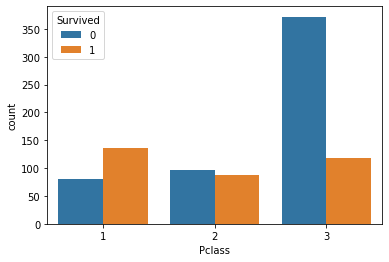

In [140]:
sns.countplot(train_data.Pclass, hue=train_data.Survived)

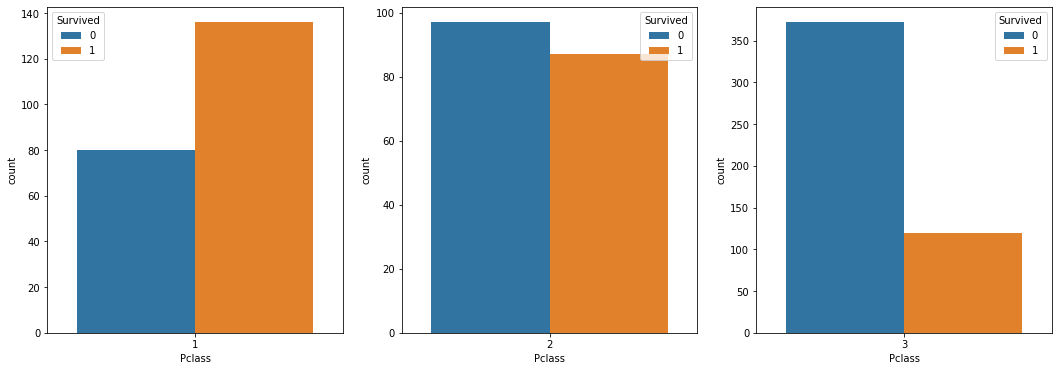

In [141]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(train_data[train_data.Pclass==1].Pclass, hue=train_data.Survived)
plt.subplot(1,3,2)
sns.countplot(train_data[train_data.Pclass==2].Pclass, hue=train_data.Survived)
plt.subplot(1,3,3)
sns.countplot(train_data[train_data.Pclass==3].Pclass, hue=train_data.Survived)
plt.show()

# Pclass and Sex

In [142]:
print("Number of males and females according to passenger class:")

train_data.groupby('Pclass')['Sex'].value_counts()

Number of males and females according to passenger class:


Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

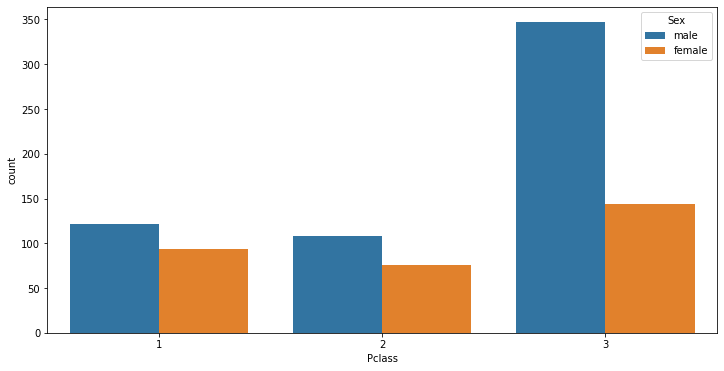

In [143]:
plt.figure(figsize=(12,6))
sns.countplot(train_data.Pclass, hue=train_data.Sex)
plt.show()

In [144]:
print("Number of males and females survived according to passenger class:")

train_data[train_data.Survived==1].groupby('Pclass')['Sex'].value_counts()

Number of males and females survived according to passenger class:


Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

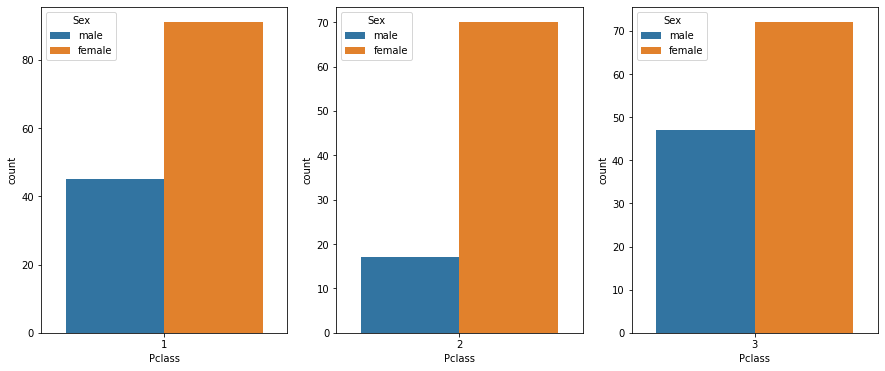

In [145]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.countplot(train_data[train_data.Pclass==1][train_data.Survived==1].Pclass, hue=train_data.Sex)
plt.subplot(1,3,2)
sns.countplot(train_data[train_data.Pclass==2][train_data.Survived==1].Pclass, hue=train_data.Sex)
plt.subplot(1,3,3)
sns.countplot(train_data[train_data.Pclass==3][train_data.Survived==1].Pclass, hue=train_data.Sex)

In [146]:
print("Number of males and females deceived according to passenger class:")

train_data[train_data.Survived==0].groupby('Pclass')['Sex'].value_counts()

Number of males and females deceived according to passenger class:


Pclass  Sex   
1       male       77
        female      3
2       male       91
        female      6
3       male      300
        female     72
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

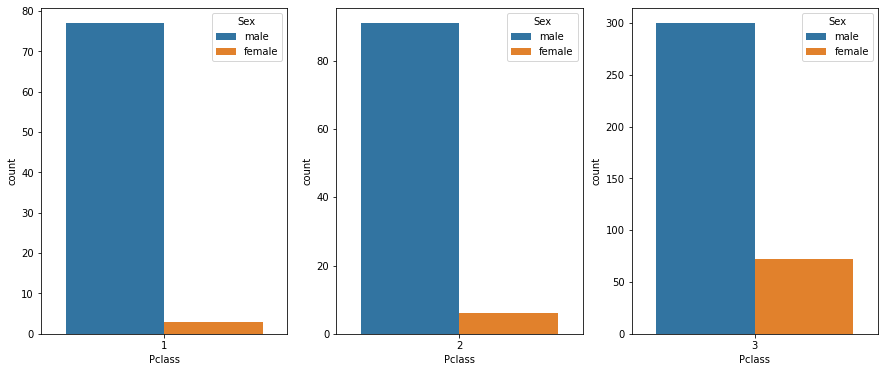

In [147]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.countplot(train_data[train_data.Pclass==1][train_data.Survived==0].Pclass, hue=train_data.Sex)
plt.subplot(1,3,2)
sns.countplot(train_data[train_data.Pclass==2][train_data.Survived==0].Pclass, hue=train_data.Sex)
plt.subplot(1,3,3)
sns.countplot(train_data[train_data.Pclass==3][train_data.Survived==0].Pclass, hue=train_data.Sex)

# Sibling or spouse

In [148]:
train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [149]:
train_data.groupby('Survived').SibSp.value_counts()

Survived  SibSp
0         0        398
          1         97
          2         15
          4         15
          3         12
          8          7
          5          5
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

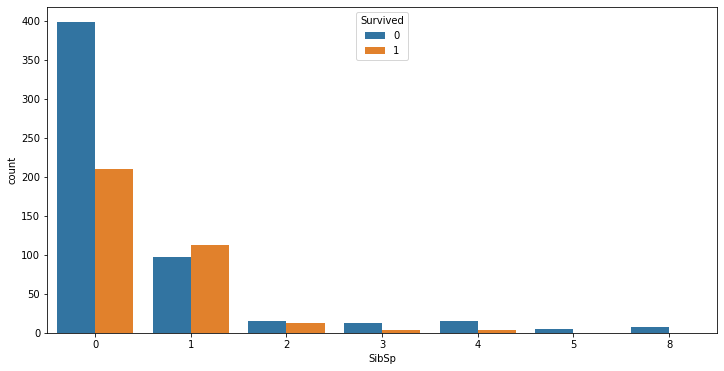

In [150]:
plt.figure(figsize=(12,6))
sns.countplot(train_data.SibSp, hue=train_data.Survived)

# SibSp and Sex

In [151]:
train_data.groupby(['Survived', 'Sex']).SibSp.value_counts()

Survived  Sex     SibSp
0         female  0         37
                  1         26
                  3          7
                  4          4
                  2          3
                  8          3
                  5          1
          male    0        361
                  1         71
                  2         12
                  4         11
                  3          5
                  5          4
                  8          4
1         female  0        137
                  1         80
                  2         10
                  3          4
                  4          2
          male    0         73
                  1         32
                  2          3
                  4          1
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

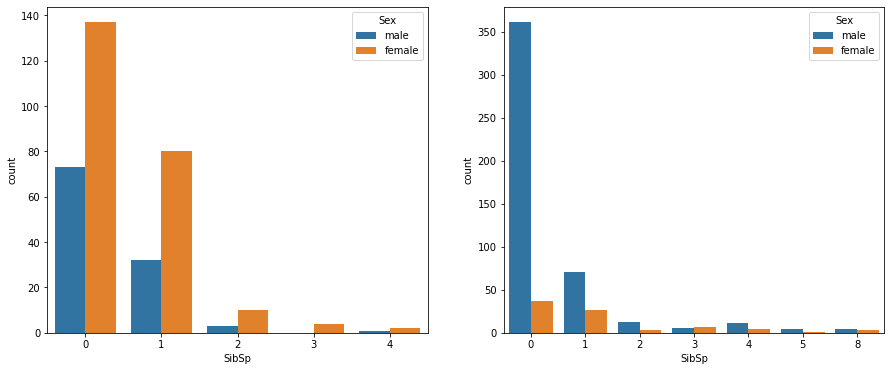

In [152]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(train_data[train_data.Survived==1].SibSp, hue=train_data.Sex)
plt.subplot(1,2,2)
sns.countplot(train_data[train_data.Survived==0].SibSp, hue=train_data.Sex)

# SibSp and Pclass 

In [153]:
train_data.groupby(['Survived', 'Pclass']).SibSp.value_counts()

Survived  Pclass  SibSp
0         1       0         60
                  1         18
                  2          1
                  3          1
          2       0         70
                  1         23
                  2          4
          3       0        268
                  1         56
                  4         15
                  3         11
                  2         10
                  8          7
                  5          5
1         1       0         77
                  1         53
                  2          4
                  3          2
          2       0         50
                  1         32
                  2          4
                  3          1
          3       0         83
                  1         27
                  2          5
                  4          3
                  3          1
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

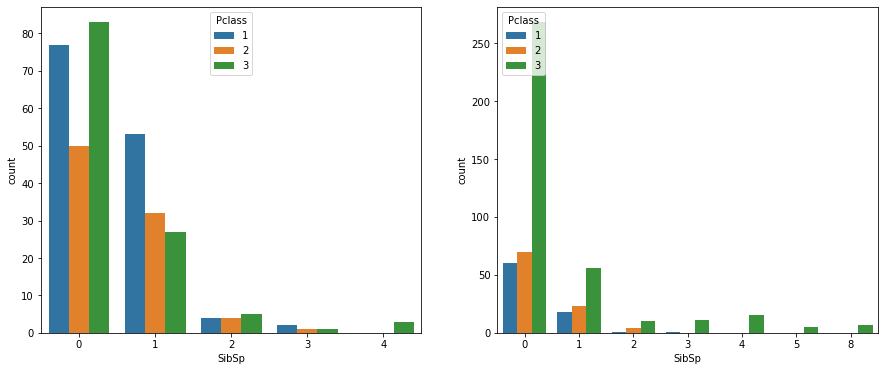

In [154]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(train_data[train_data.Survived==1].SibSp, hue=train_data.Pclass)
plt.subplot(1,2,2)
sns.countplot(train_data[train_data.Survived==0].SibSp, hue=train_data.Pclass)

# Parch

In [155]:
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [156]:
train_data.groupby('Survived').Parch.value_counts()

Survived  Parch
0         0        445
          1         53
          2         40
          4          4
          5          4
          3          2
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

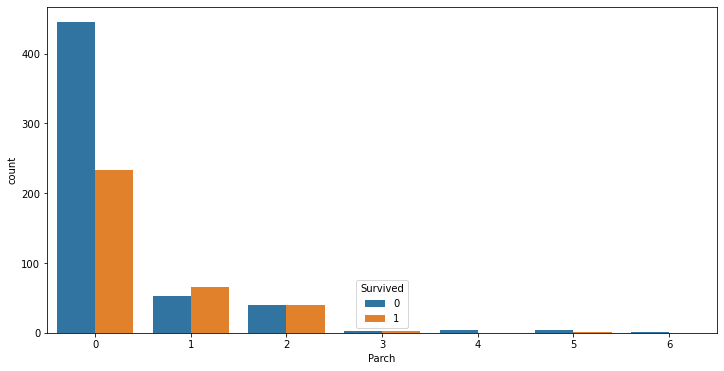

In [157]:
plt.figure(figsize=(12,6))
sns.countplot(train_data.Parch, hue=train_data.Survived)

# Parch and Sex

In [158]:
train_data.groupby(['Survived', 'Sex']).Parch.value_counts()

Survived  Sex     Parch
0         female  0         41
                  2         19
                  1         14
                  5          3
                  4          2
                  3          1
                  6          1
          male    0        404
                  1         39
                  2         21
                  4          2
                  3          1
                  5          1
1         female  0        153
                  1         46
                  2         30
                  3          3
                  5          1
          male    0         80
                  1         19
                  2         10
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

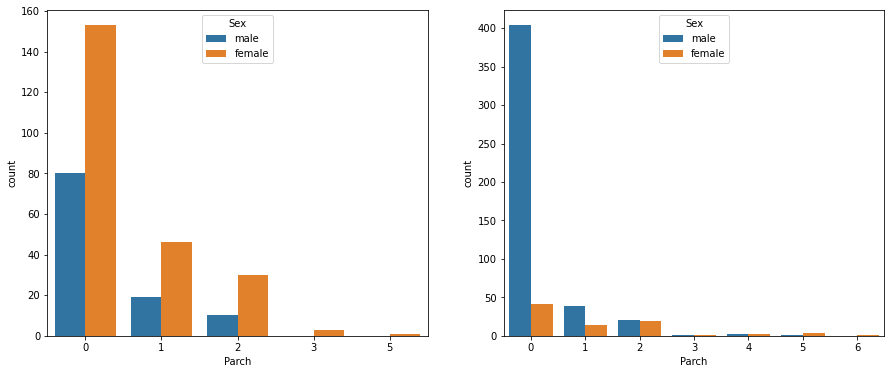

In [159]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(train_data[train_data.Survived==1].Parch, hue=train_data.Sex)
plt.subplot(1,2,2)
sns.countplot(train_data[train_data.Survived==0].Parch, hue=train_data.Sex)

# Parch and Pclass

In [160]:
train_data.groupby(['Survived', 'Pclass']).Parch.value_counts()

Survived  Pclass  Parch
0         1       0         64
                  1         10
                  2          5
                  4          1
          2       0         86
                  1          8
                  2          3
          3       0        295
                  1         35
                  2         32
                  5          4
                  4          3
                  3          2
                  6          1
1         1       0         99
                  1         21
                  2         16
          2       0         48
                  1         24
                  2         13
                  3          2
          3       0         86
                  1         20
                  2         11
                  3          1
                  5          1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

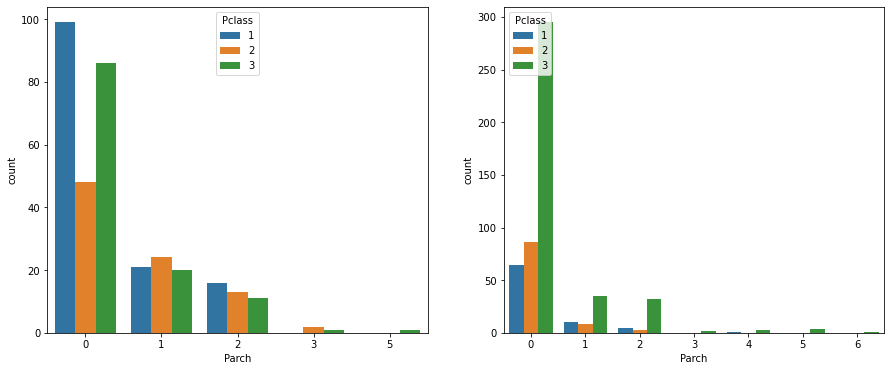

In [161]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(train_data[train_data.Survived==1].Parch, hue=train_data.Pclass)
plt.subplot(1,2,2)
sns.countplot(train_data[train_data.Survived==0].Parch, hue=train_data.Pclass)

# Data Preprocessing

In [162]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [163]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [164]:
label_encoder = LabelEncoder()
train_data.Sex = label_encoder.fit_transform(train_data.Sex)
train_data.Embarked = label_encoder.fit_transform(train_data.Embarked)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [165]:
cols=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
standard_scaler = MinMaxScaler()
train_data_scaled = standard_scaler.fit_transform(train_data.to_numpy())
train_data = pd.DataFrame(train_data_scaled, columns=cols)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.666667
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.000000
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,0.666667
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.666667
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.666667


In [166]:
X = train_data.drop(['Survived'], axis=1)
y = train_data.Survived

In [167]:
print(X.shape, y.shape)

(891, 7) (891,)


In [168]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [169]:
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [170]:
test_data = pd.read_csv("titanic_test.csv")

In [171]:
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [172]:
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [173]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [174]:
test_data.Age.fillna(test_data.Age.mean(), inplace=True)

In [175]:
test_data.Fare.fillna(test_data.Fare.mean(), inplace=True)

In [176]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [177]:
label_encoder = LabelEncoder()
test_data.Sex = label_encoder.fit_transform(test_data.Sex)
test_data.Embarked = label_encoder.fit_transform(test_data.Embarked)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [178]:
cols=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
standard_scaler = MinMaxScaler()
test_data_scaled = standard_scaler.fit_transform(test_data.to_numpy())
test_data = pd.DataFrame(test_data_scaled, columns=cols)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.5
1,1.0,0.0,0.617566,0.125,0.000000,0.013663,1.0
2,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.5
3,1.0,1.0,0.353818,0.000,0.000000,0.016908,1.0
4,1.0,0.0,0.287881,0.125,0.111111,0.023984,1.0


In [179]:
X_test = test_data
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float64
 1   Sex       418 non-null    float64
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    float64
 4   Parch     418 non-null    float64
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    float64
dtypes: float64(7)
memory usage: 23.0 KB


In [180]:
y_test = pd.read_csv("test_label.csv")
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [181]:
y_test.drop('PassengerId', axis=1, inplace=True)

In [182]:
y_test=y_test.to_numpy()
type(y_test)

numpy.ndarray

# Logistic Regression

In [183]:
LR = LogisticRegression()

In [184]:
LR.fit(X, y)
y_pred = LR.predict(X_test)

In [185]:
cm = confusion_matrix(y_pred, y_test)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[256  15]
 [ 10 137]]


In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       266
           1       0.93      0.90      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418



# Naive Bayes Classification

In [187]:
NB = GaussianNB()

In [188]:
NB.fit(X, y)
y_pred = NB.predict(X_test)

In [189]:
cm = confusion_matrix(y_pred, y_test)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[231   6]
 [ 35 146]]


In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       266
           1       0.81      0.96      0.88       152

    accuracy                           0.90       418
   macro avg       0.89      0.91      0.90       418
weighted avg       0.91      0.90      0.90       418



# K Nearest Neighbors

In [191]:
KNN = KNeighborsClassifier()

In [192]:
KNN.fit(X, y)
y_pred = KNN.predict(X_test)

In [193]:
cm = confusion_matrix(y_pred, y_test)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[242  45]
 [ 24 107]]


In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       266
           1       0.82      0.70      0.76       152

    accuracy                           0.83       418
   macro avg       0.83      0.81      0.82       418
weighted avg       0.83      0.83      0.83       418



# Decision Tree Classificarion

In [195]:
DT = DecisionTreeClassifier()

In [196]:
DT.fit(X, y)
y_pred = DT.predict(X_test)

In [197]:
cm = confusion_matrix(y_pred, y_test)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[221  43]
 [ 45 109]]


In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       266
           1       0.71      0.72      0.71       152

    accuracy                           0.79       418
   macro avg       0.77      0.77      0.77       418
weighted avg       0.79      0.79      0.79       418



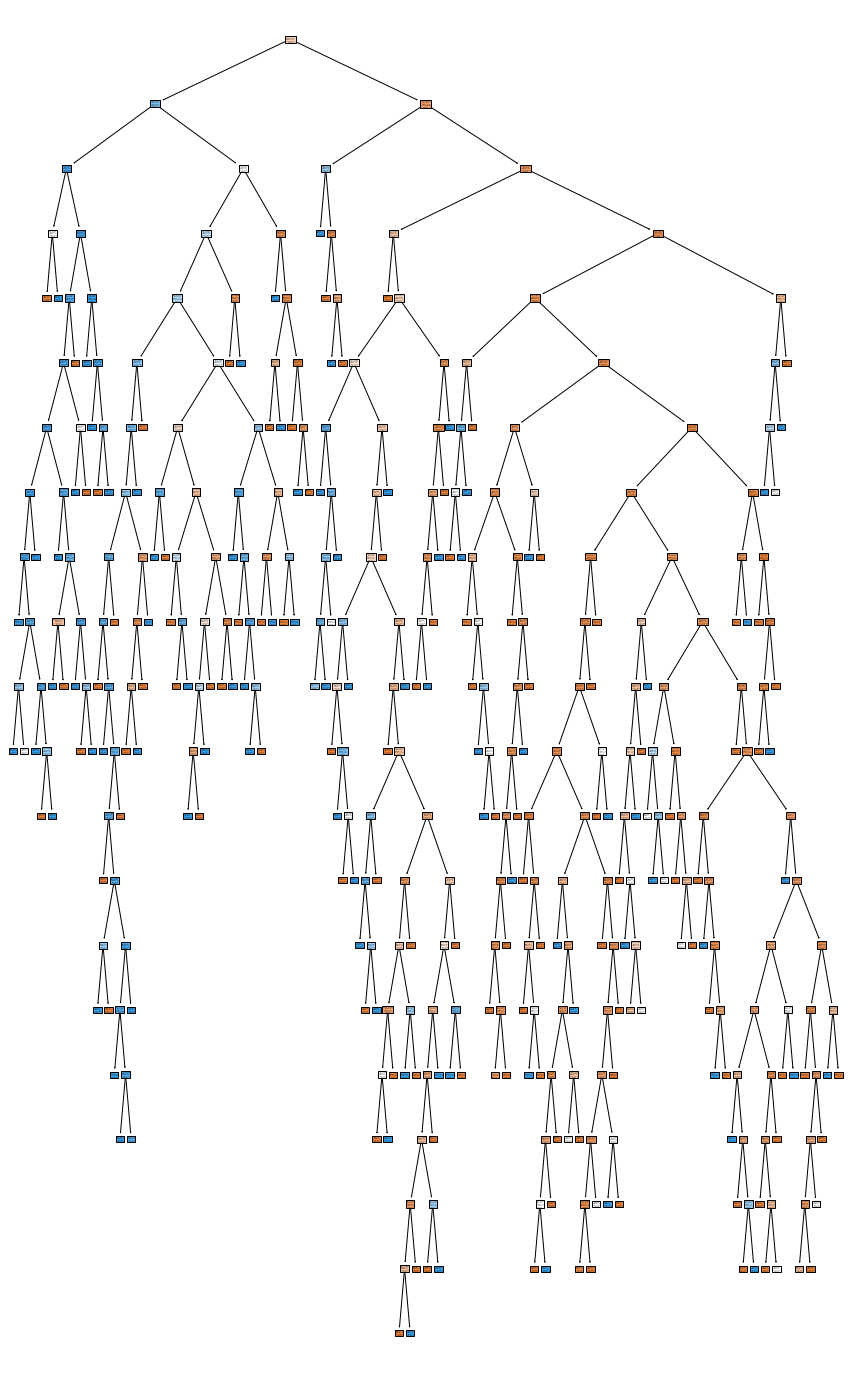

In [199]:
fig = plt.figure(figsize=(15,25))
_ = tree.plot_tree(DT, 
                  feature_names = cols,
                  class_names = ['0','1'],
                  filled = True)
plt.show()